Number of cells 35632
quantiles 0.025440165193955755 1.010847811189348
178


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


DONE


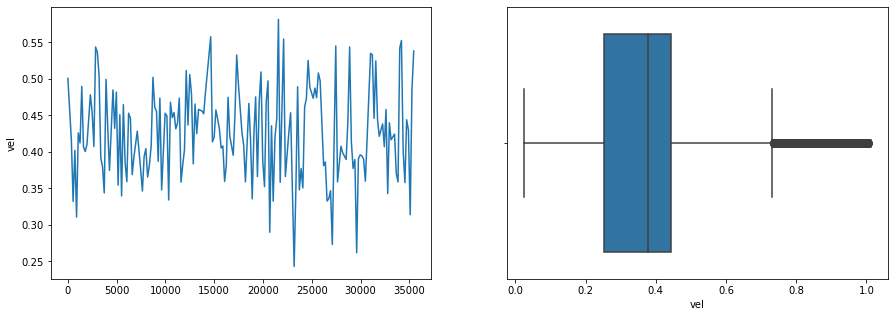

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os.path
import seaborn as sns
from scipy import stats

%matplotlib inline


def getPWList(inf):
    vel = []
    ang = []
    tngE = []
    nrmE = []
    totEList = []
    data = []
    totNrmE = 0
    totTangE = 0
    totE = 0
    with open(inf.strip()) as f:
        count = 0
        tm = 0.
        for line in f:
            if(count > 50):
                if(line.strip().split()[0] == "Time"):
                    tm = float(line.split()[1])
                if(tm > 0.0):
                    if(line.strip().split()[0] != "Time"):
                        cnt = int(line.split()[1])
                        x = 1.e3*float(line.split()[5])
                        z = 1.e3*float(line.split()[7])
                        r = np.sqrt(x**2+z**2)
                        v = float(line.split()[2])
                        if(count > 0 and cnt < 2):
                            # Angle between normal and velocity in radians
                            rad = float(line.split()[3])
                            
                            r = 0.5*1e-3*float(line.split()[4])
                            m = (4./3.)*8050*np.pi*r**3

                            nE = 0.5*m*(v*np.cos(rad))**2
                            tE = 0.5*m*(v*np.sin(rad))**2
                            nrmE.append(nE)
                            tngE.append(tE)
                            totNrmE += nE
                            totTangE += tE
                            totE += np.sqrt(nE**2+tE**2)
                            totEList.append(np.sqrt(nE**2+tE**2))
                            vel.append(v)
                            # Angle between impact velocity and contact surface 
                            theta = 90 - (180./np.pi)*float(line.split()[3])
                            
                            #theta = float(line.split()[3])
                            if(theta > 0):
                                ang.append(theta)
#                             ls.append(float(line.split()[2]))
                            data.append([v,theta,nE,tE,totE])
    
            count += 1
    return data


def getPPList(inf):
    vel = []
    ang = []
    tngE = []
    nrmE = []
    totEList = []
    totNrmE = 0
    totTangE = 0
    totE = 0
    data = []
    with open(inf.strip()) as f:
        v = theta = nE = tE = nE = tE = totE = 0
        count = 0
        tm = 0.
        for line in f:
            if(count > 3):
                if(line.split()[0] == 'Time'):
                    tm = float(line.split()[1])
                if(tm > 0.0):
                    if(line.split()[0] != "Time"):
                        x = 1.e3*float(line.split()[6])
                        z = 1.e3*float(line.split()[8])
                        r = np.sqrt(x**2+z**2)
                        v = float(line.split()[4])
                        if(count > 3):
                            # Angle between normal and velocity in radians
                            rad = float(line.split()[5])
                            
                            r1 = 0.5*1e-3*float(line.split()[2])
                            r2 = 0.5*1e-3*float(line.split()[3])
                            r = r1*r2/(r1+r2)
                            m = (4./3.)*8050.0*np.pi*r**3
                            
                            nE = 0.5*m*(v*np.cos(rad))**2
                            tE = 0.5*m*(v*np.sin(rad))**2
                            nrmE.append(nE)
                            tngE.append(tE)
                            totNrmE += nE
                            totTangE += tE
                            totE += np.sqrt(nE**2+tE**2)
                            totEList.append(np.sqrt(nE**2+tE**2))
                            vel.append(v)
                            # Angle between impact velocity and contact surface 
                            theta = 90 - (180./np.pi)*float(line.split()[5])
                            
                            #theta = float(line.split()[3])
                            if(theta > 0.5):
                                ang.append(theta)
                            data.append([v,theta,nE,tE,totE])
            count += 1
    return data


def readFile(fin):
    data = []
    with open (fin) as f:
        for line in f:
            if(line.split()[0] != 'TIME'):
                cell = int(line.split()[0])
                x = float(line.split()[1])
                y = float(line.split()[2])
                z = float(line.split()[3])
                vx = float(line.split()[4])
                vy = float(line.split()[5])
                vz = float(line.split()[6])
                gt = float(line.split()[7])
                vel = np.sqrt(vx*vx+vy*vy+vz*vz)
                if(np.sqrt(vx**2+vy**2+vz**2) > 1e-3):
                    data.append([cell, x, y, z, vx,vy,vz,vel,gt])
    return data
 
   

def boxPlot(df, var, fig, axes, qmin, qmax):
    # Filter data 
    q_low = df[var].quantile(qmin)
    q_hi  = df[var].quantile(qmax)
    
    print('quantiles', q_low,q_hi)
    
#     q_low = df[var].quantile(0)
#     q_hi  = df[var].quantile(1)
    
#     print(q_low)
#     print(q_hi)
    df_filt = df[(df[var] < q_hi) & (df[var] > q_low)]
    sns.boxplot(df_filt[var])
#     sns.boxplot(ax=axes[0],data=df_filt[var])
    return df_filt

def rugPlot(df, var, fig, axes):
    sns.rugplot(ax=axes[1],data=df[var])
     

def plotDist(df, var, fig, axes, xlb, ylb):
#     sns.distplot(ax=axes[0], data=df[var]) # plot kde and shade
    axes[0].set(xlabel=xlb, ylabel=ylb)
    sns.kdeplot(ax=axes[0], data=df[var], label='508mm')
#     sns.kdeplot(ax=axes[0], data=df[var], bw=0.2) # plot only the line
#     sns.kdeplot(ax=axes[0], data=df[var], cumulative=True) # cumulative plot
#     sns.kdeplot(ax=axes[0], x=df['vz'], y=df['vx'], shade=True, cbar=True) # contour plot
   
 
def readFile(fin):
    data = []
    with open (fin) as f:
        for line in f:
            if(line.split()[0] != 'TIME'):
                cell = int(line.split()[0])
                x = float(line.split()[1])
                y = float(line.split()[2])
                z = float(line.split()[3])
                vx = float(line.split()[4])
                vy = float(line.split()[5])
                vz = float(line.split()[6])
                gt = float(line.split()[7])
                vel = np.sqrt(vx*vx+vy*vy+vz*vz)
                if(np.sqrt(vx**2+vy**2+vz**2) > 1e-3):
                    data.append([cell, x, y, z, vx,vy,vz,vel,gt])
    return data
 
   

def boxPlot(df, var, fig, axes, qmin, qmax):
    # Filter data 
    q_low = df[var].quantile(qmin)
    q_hi  = df[var].quantile(qmax)
    
    print('quantiles', q_low,q_hi)
    
#     q_low = df[var].quantile(0)
#     q_hi  = df[var].quantile(1)
    
#     print(q_low)
#     print(q_hi)
    df_filt = df[(df[var] < q_hi) & (df[var] > q_low)]
    sns.boxplot(df_filt[var])
#     sns.boxplot(ax=axes[0],data=df_filt[var])
    return df_filt

def rugPlot(df, var, fig, axes):
    sns.rugplot(ax=axes[1],data=df[var])
     

def plotDist(df, var, fig, axes, xlb, ylb, lbl):
    axes[0].set(xlabel=xlb, ylabel=ylb)
#     sns.distplot(df[var], label='508mm') # plot kde and shade
    
    sns.kdeplot(ax=axes[0], data=df[var], label=lbl)
    lg = axes[0].legend()
    lg.get_frame().set_alpha(0)
#     lg = plt.legend(loc="upper left")
#     lg.get_frame().set_alpha(0)
#     sns.kdeplot(ax=axes[0], data=df[var], bw=0.2) # plot only the line
#     sns.kdeplot(ax=axes[0], data=df[var], cumulative=True) # cumulative plot
#     sns.kdeplot(ax=axes[0], x=df['vz'], y=df['vx'], shade=True, cbar=True) # contour plot


def plotCellData(df1, var, fig, axes, xlb, ylb, lbl):
    extract = (df1['cell'] == 551)
    df1 = df1[extract]
    
#     extract = (df1['cell'] < 500)
#     df1 = df1[extract]    
    
    print(len(df1))
#     axes[0].scatter(df1['vel'])
    sns.lineplot(ax=axes[0], data=df1[var])
 
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
var = 'vel'

xlb = 'Velocity (m/s)'
xlb = '$GT (m/s)^{2}$'
xlb = 'Impact Energy (J)'
ylb = 'Probability Density'
lbl = '254mm'

path = '../../drum/254mm/25.4mm/0.5J/0.5N'
fin = os.path.join(path, 'bdbox.dat')
data = readFile(fin)
df = pd.DataFrame(data, columns=['cell', 'x', 'y', 'z','vx','vy','vz', 'vel','gT'])

# fin = os.path.join(path, 'pw-impact.dat')
# data = getPWList(fin)
print('Number of cells',len(data))
# df = pd.DataFrame(data, columns=['v','theta','nE','tE','totE'])
# Box plot
df_filt = boxPlot(df, var, fig, axes, 0.001, 0.99)
plotCellData(df_filt, var, fig, axes, xlb, ylb, lbl)
# Plot Distribution
# plotDist(df_filt, var, fig, axes, xlb, ylb, '254mm')



# path = '../../drum/508mm/25.4mm/0.5J/0.5N'
# # fin = os.path.join(path, 'bdbox.dat')
# # data = readFile(fin)
# # df = pd.DataFrame(data, columns=['cell', 'x', 'y', 'z','vx','vy','vz', 'vel','gT'])
# # print('Number of cells',len(data))

# fin = os.path.join(path, 'pw-impact.dat')
# data = getPWList(fin)
# print('Number of cells',len(data))
# df = pd.DataFrame(data, columns=['v','theta','nE','tE','totE'])
# # # Box plot
# df_filt = boxPlot(df, var, fig, axes, 0.001, 0.7)
# # # Plot Distribution
# plotDist(df_filt, var, fig, axes, xlb, ylb, '508mm')



# path = '../../drum/1000mm/25.4mm/0.5J/0.5N'
# # fin = os.path.join(path, 'bdbox.dat')
# # data = readFile(fin)
# # df = pd.DataFrame(data, columns=['cell', 'x', 'y', 'z','vx','vy','vz', 'vel','gT'])
# # print('Number of cells',len(data))
# fin = os.path.join(path, 'pw-impact.dat')
# data = getPWList(fin)
# print('Number of cells',len(data))
# df = pd.DataFrame(data, columns=['v','theta','nE','tE','totE'])
# # # Box plot
# df_filt = boxPlot(df, var, fig, axes, 0.001, 0.6)
# # # Plot Distribution
# plotDist(df_filt, var, fig, axes, xlb, ylb, '1000mm')


# path = '../../drum/3000mm/25.4mm/0.5J/0.5N'
# # fin = os.path.join(path, 'bdbox.dat')
# # data = readFile(fin)
# # df = pd.DataFrame(data, columns=['cell', 'x', 'y', 'z','vx','vy','vz', 'vel','gT'])
# # print('Number of cells',len(data))
# fin = os.path.join(path, 'pw-impact.dat')
# data = getPWList(fin)
# print('Number of cells',len(data))
# df = pd.DataFrame(data, columns=['v','theta','nE','tE','totE'])
# # # Box plot
# df_filt = boxPlot(df, var, fig, axes, 0.001, 0.5)
# # # Plot Distribution
# plotDist(df_filt, var, fig, axes, xlb, ylb, '3000mm')


# path = '../../drum/4000mm/25.4mm/0.3J/0.5N'
# fin = os.path.join(path, '_bdbox.dat')
# data = readFile(fin)
# df = pd.DataFrame(data, columns=['cell', 'x', 'y', 'z','vx','vy','vz', 'vel','gT'])
# print('Number of cells',len(data))
# # Box plot
# df_filt = boxPlot(df, var, fig, axes, 0.001, 0.5)
# # Plot Distribution
# plotDist(df_filt, var, fig, axes, xlb, ylb, '4000mm')


fout = os.path.join(path, "impactE.jpg")
fig.savefig(fout, dpi=300)










# lg = plt.legend(loc="upper left")
# lg.get_frame().set_alpha(0)
# Rugplot
# rugPlot(df, var)


    

#g = sns.FacetGrid(data=df, col=)

print('DONE')



In [2]:
# sns.rugplot(df[var])

# # Set up the x-axis for the plot
# x_min = df_filt[var].min()
# x_max = df_filt[var].max()

# print(x_min)

# # 100 equally spacced points from x_min to m_max
# x_axis = np.linspace(x_min,x_max,100)

# # From Wikipedia
# bandwidth = ((4*df[var].std()**5)/(3*len(df[var])))**2

# # Create an empty kernal list
# kernal_list = []


# for data_point in df[var]:
#     # Create a kernal for each point and append to list
#     kernal = stats.norm(data_point,bandwidth).pdf(x_axis)
#     kernal_list.append(kernal)
# #     print(kernal.max())
    
#     # Scale for plotting
#     if(kernal.max() > 0):
#         kernal = kernal/kernal.max()
#         kernal = kernal*.4
#         plt.plot(x_axis, kernal, color='gray', alpha=0.5)
    
    
# plt.ylim(0,1)

In [3]:
# plotDist(df['vel'])

In [4]:
# inf = os.path.join(path, "pw-impact.dat")
# (v1, ang1, nrmE1, tngE1, totNE, totTE,totE, totElist) = getPWList(inf)

# inf = os.path.join(path, "pp-impact.dat")
# data = getPPList(inf)

# df2 = pd.DataFrame(data, columns=['v','theta','nE','tE','nE','tE','totE'])
# print(df2.head())

# selected = df['cell'] == '551'
# if (selected): print(selected)
# df2 = df[selected]
# df2 = df
# print(df.tail())
# plt.plot(df2['gT'])

# gt = sns.load_dataset('tips')
# print(type(gt))

# sns.distplot(df['vx'], bins=60)
# sns.distplot(df['vy'], bins=60)
# sns.distplot(df['vz'], bins=60)
# sns.jointplot(x=df['vx'], y=df['gT'], data=df)

# Filter data 
# q_low = df["vx"].quantile(0.002)
# q_hi  = df["vx"].quantile(0.995)

# q_low = df["vx"].quantile(0.002)
# q_hi  = df["vx"].quantile(0.995)


# df_filtered = df2[(df2["tE"] < q_hi) & (df2["tE"] > q_low)]

# # sns.pairplot(df)
# sns.distplot(df2['nE'])
# sns.distplot(df2['tE'])
# sns.distplot(df2['totE'])
# sns.boxplot(data=df_filtered['gT'])
# sns.violinplot(data=df_filtered['gT'])